In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

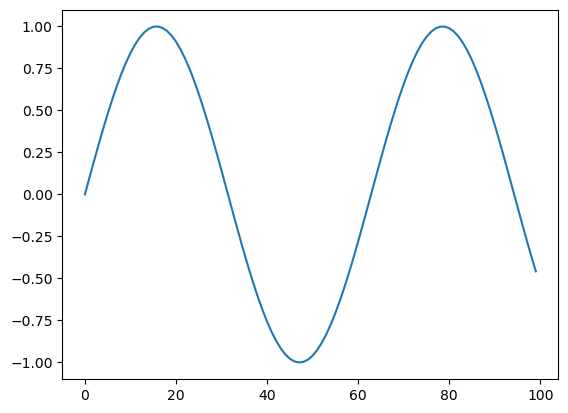

In [183]:
x=np.arange(0,200,0.1)
x=np.sin(x)
plt.plot(x[:100])

In [184]:
len(x)

2000

In [185]:
x_new=np.array(x)
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(-1,1))
scaled_data=scalar.fit_transform(x_new.reshape(-1,1))

In [186]:
scaled_data.shape

(2000, 1)

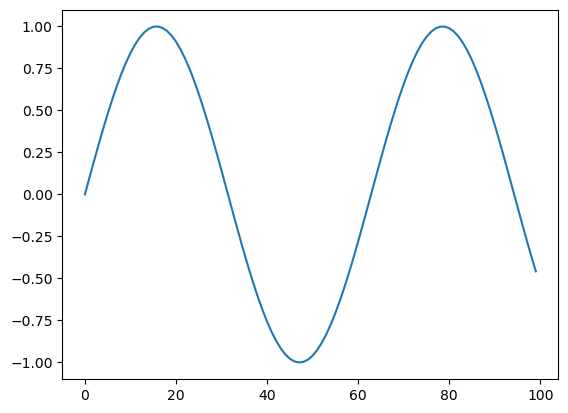

In [187]:
plt.plot(scaled_data[:100])

# Independent and dependent features extracting code

In [188]:
#x = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12],[13],[14],[15],[16],[17],[18],[19],[20],[21],[22]]
x=scaled_data
window=30
days = 7
ln = (len(x)-window)%(days)
x = x[0:len(x)-ln]

#print(range(window, len(x), days))
def independet_prep(window,x):
    independent_features = []
    for i in range(window, len(x), days):
        independent_features.append(x[i-window:i])

    independent_features = np.array(independent_features)
    return independent_features


def dependent_prep(window,x):
    dependent_features = []
    for i in range(window, len(x), days):
        dependent_features.append(x[i:i+days])
        
    dependent_features = np.array(dependent_features)
    #here dependent_features[1: ] to all because the response at first index i don't want 
    return dependent_features

x1=independet_prep(window,x)
y2=dependent_prep(window,x)
#x1=x2.reshape(x2.shape[0],x2.shape[1])
y1=y2.reshape(y2.shape[0],y2.shape[1])

In [189]:
x1.shape,y1.shape

((281, 30, 1), (281, 7))

In [190]:
training_size=round(len(x1)*0.7)
val_size=round(len(x1)*0.2)
x_train,y_train=x1[:training_size],y1[:training_size]
x_val,y_val=x1[val_size:training_size],y1[val_size:training_size]
x_test,y_test=x1[training_size:],y1[training_size:]
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)


(197, 30, 1)
(197, 7)
(141, 30, 1)
(141, 7)
(84, 30, 1)
(84, 7)


In [191]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential

In [192]:
model=Sequential()

In [193]:
#model.add(Dense(units=20,,activation='sigmoid'))
model.add(LSTM(units=64,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dense(units=10,activation='tanh'))
model.add(Dense(units=days,activation='linear'))

In [194]:
model.compile(loss='mae',optimizer='Adam',metrics=['mean_absolute_error'])

In [215]:
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=200)

Epoch 1/200
7/7 [==============================] - 0s 53ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062
Epoch 2/200
7/7 [==============================] - 0s 39ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082
Epoch 3/200
7/7 [==============================] - 0s 40ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071
Epoch 4/200
7/7 [==============================] - 0s 37ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089
Epoch 5/200
7/7 [==============================] - 0s 40ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - val_loss: 0.0138 - val_mean_absolute_error: 0.0138
Epoch 6/200
7/7 [==============================] - 0s 40ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124
Epoch 7/200
7/7 [===========

In [216]:
x_test,x_test.shape

(array([[[-0.32412213],
         [-0.22805827],
         [-0.12971578],
         ...,
         [ 0.69733127],
         [ 0.62229179],
         [ 0.54103453]],
 
        [[ 0.36154074],
         [ 0.45281517],
         [ 0.53956517],
         ...,
         [ 0.07160353],
         [-0.02833183],
         [-0.12798416]],
 
        [[ 0.87716305],
         [ 0.92072026],
         [ 0.95507789],
         ...,
         [-0.58780278],
         [-0.66563286],
         [-0.7368122 ]],
 
        ...,
 
        [[-0.17780001],
         [-0.07866845],
         [ 0.02124908],
         ...,
         [ 0.5813075 ],
         [ 0.49717026],
         [ 0.4080654 ]],
 
        [[ 0.49796682],
         [ 0.58205446],
         [ 0.66032636],
         ...,
         [-0.07958388],
         [-0.17870361],
         [-0.27603784]],
 
        [[ 0.93952976],
         [ 0.96902576],
         [ 0.98883953],
         ...,
         [-0.70304802],
         [-0.77053267],
         [-0.83031847]]]),
 (84, 30, 1))

In [217]:
predict=model.predict(x_test)
print("shape of predict",predict.shape)
print("shape of y_test",y_test.shape)

3/3 [==============================] - 0s 9ms/step
shape of predict (84, 7)
shape of y_test (84, 7)


In [218]:

from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,predict)
print("Test_error",mae)

Test_error 0.004790792043459226


In [219]:
train_predict=model.predict(x_train)
print("shape of train_predict",train_predict.shape)
print("shape of y_train",y_train.shape)

7/7 [==============================] - 0s 8ms/step
shape of train_predict (197, 7)
shape of y_train (197, 7)


In [220]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_train,train_predict)
print("Training_error",mae)

Training_error 0.004570935019656071


In [221]:
predict.shape,y_test.shape

((84, 7), (84, 7))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


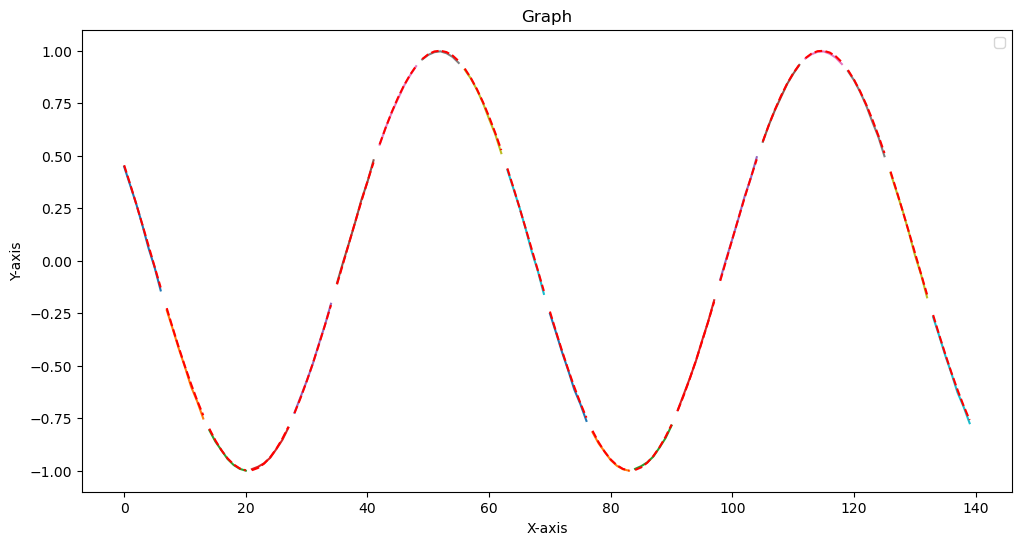

In [222]:
predict_flatten=predict.flatten()
data = predict_flatten.tolist()  
#print("length of data list",len(data))
actual_flatten = y_test.flatten()
actual_data = actual_flatten.tolist()

reshaped_data = [data[i:i+days] for i in range(0, len(data), days)]
fig, ax = plt.subplots(figsize=(12,6))

for i, row in enumerate(reshaped_data[:20]): 
    x = range(i*days, (i+1)*days)
    ax.plot(x, row)  

reshaped_data2 = [actual_data[i:i+days] for i in range(0, len(actual_data), days)]
    
# Plot each row of data (actual values)
for j, col in enumerate(reshaped_data2[:20]):
    y = range(j*days, (j+1)*days)
    ax.plot(y, col, linestyle='--', color='red')
    
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Graph')
ax.legend()
plt.show()

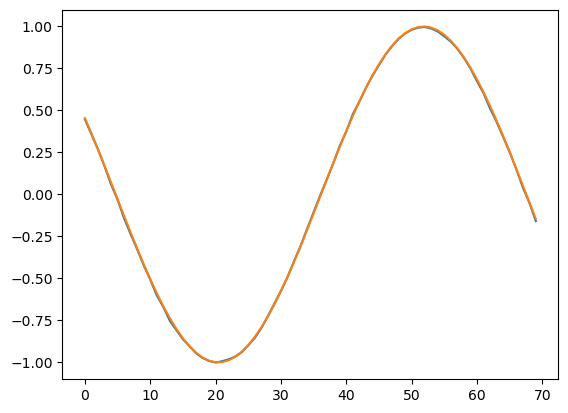

In [223]:
plt.plot(predict[:10].flatten())
plt.plot(y_test[:10].flatten())